In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [3]:
df = pd.read_csv('amd_stock_price.csv')

# Data preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df = df[::-1]
df.set_index('Date', inplace=True)

df.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2020-12-31,91.71,92.10,92.30,90.87,24.93M,-0.63%
2021-01-04,92.30,92.11,96.06,90.92,51.80M,0.64%
2021-01-05,92.77,92.10,93.21,91.41,34.21M,0.51%
2021-01-06,90.33,91.62,92.28,89.46,51.91M,-2.63%
2021-01-07,95.16,91.33,95.51,91.20,42.90M,5.35%


In [4]:
# Create index as feature
df['Index'] = np.arange(len(df))

In [5]:
train_size = int(len(df) * 0.7)
test_size = int(len(df) * 0.2)

train_data = df.iloc[:train_size]
test_data = df.iloc[train_size : train_size + test_size]
val_data = df.iloc[train_size + test_size - 1:]

In [6]:
# Create features and labels
X_train = train_data['Index'].values.reshape(-1, 1)
y_train = train_data['Price'].values
X_test = test_data['Index'].values.reshape(-1, 1)
y_test = test_data['Price'].values
X_val = val_data['Index'].values.reshape(-1, 1)
y_val = val_data['Price'].values

In [7]:
# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [8]:
# Dự đoán trên tập validation
predict_val = model.predict(X_val)

val_rmse = np.sqrt(mean_squared_error(y_val, predict_val))
val_mae = mean_absolute_error(y_val, predict_val)
val_mape = np.mean(np.abs((y_val - predict_val) / np.abs(y_val))) * 100

# In kết quả đánh giá
print("\nĐánh giá mô hình trên tập validation:")
print(f"Validation_RMSE: {val_rmse:.4f}")
print(f"Validation_MAE: {val_mae:.4f}")
print(f"Validation_MAPE: {val_mape:.4f}%")


Đánh giá mô hình trên tập validation:
Validation_RMSE: 20.7066
Validation_MAE: 16.7091
Validation_MAPE: 13.4163%


In [9]:
# Dự đoán trên tập test
predict_test = model.predict(X_test)

test_rmse = np.sqrt(mean_squared_error(y_test, predict_test))
test_mae = mean_absolute_error(y_test, predict_test)
test_mape = np.mean(np.abs((y_test - predict_test) / np.abs(y_test))) * 100

print("\nĐánh giá mô hình trên tập test:")
print(f"Test_RMSE: {test_rmse:.4f}")
print(f"Test_MAE: {test_mae:.4f}")
print(f"Test_MAPE: {test_mape:.4f}%")


Đánh giá mô hình trên tập test:
Test_RMSE: 60.7993
Test_MAE: 58.5660
Test_MAPE: 35.5773%


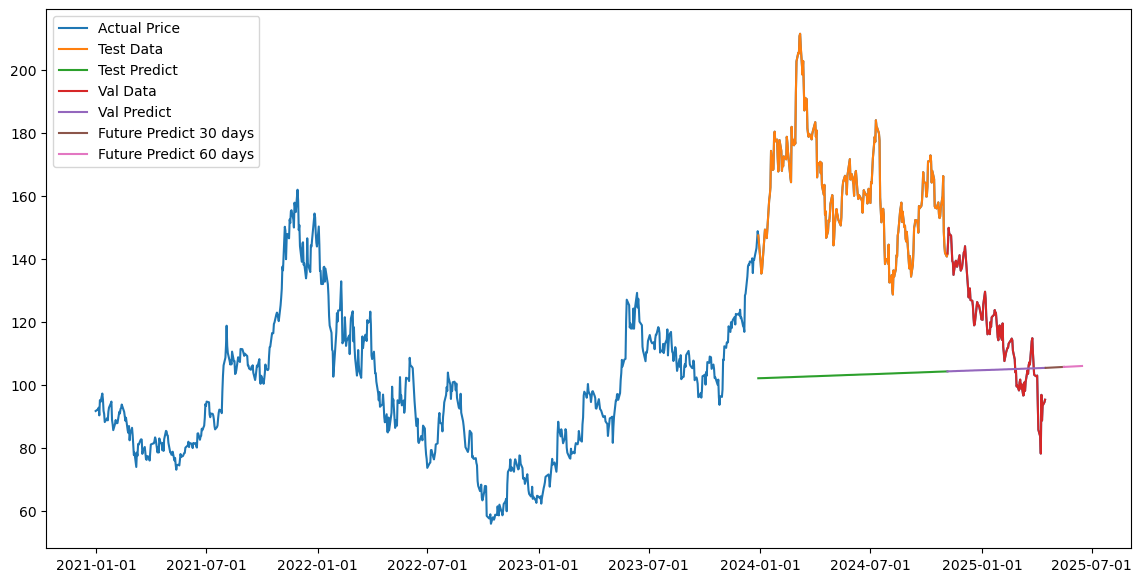

In [10]:
import matplotlib.dates as mdates
future_index = np.arange(len(df), len(df) + 60).reshape(-1, 1)
future_predict = model.predict(future_index)

# Calculate the start date and end dates for the future predictions
start_date = df.index[-1] + pd.Timedelta(days=1)
end_date_30 = start_date + pd.Timedelta(days=30)
end_date_60 = start_date + pd.Timedelta(days=60)

# Create date ranges for the future predictions
predict_dates_30 = pd.date_range(start=start_date, end=end_date_30)
predict_dates_60 = pd.date_range(start=end_date_30, end=end_date_60)

# Plot the results
plt.figure(figsize=(14, 7))

# Plot actual data
plt.plot(df.index, df['Price'], label='Actual Price')

# Plot test data and predictions
plt.plot(test_data.index, y_test, label='Test Data')
plt.plot(test_data.index, predict_test, label='Test Predict')

plt.plot(val_data.index, y_val, label='Val Data')
plt.plot(val_data.index, predict_val, label='Val Predict')

# Plot future predictions for 30, 60, and 90 days
plt.plot(predict_dates_30, future_predict[:31], label='Future Predict 30 days')
plt.plot(predict_dates_60, future_predict[29:], label='Future Predict 60 days')

# Format the x-axis
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Display the legend
plt.legend()

# Display the plot
plt.show()